In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import pickle
%matplotlib inline

In [2]:
with open("../saved-experiments/width_depth_experiment_logs.pkl", "rb") as handle:
    dump = pickle.load(handle)

In [37]:
dump.keys()

dict_keys(['eff_dim', 'losses', 'parameters'])

In [3]:
eff_dim = dump['eff_dim']
losses = dump['losses']
pars = dump['parameters']

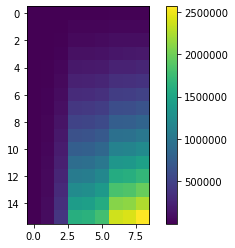

In [4]:
plt.imshow(pars)
plt.colorbar()

In [5]:
par_counts = np.zeros_like(pars)

In [6]:
np.where(pars < 1500)

(array([0, 0, 1]), array([0, 1, 0]))

Text(0, 0.5, 'Width')

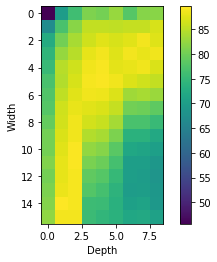

In [7]:
plt.imshow(eff_dim)
plt.colorbar()
plt.xlabel('Depth')
plt.ylabel('Width')

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

revcolors = np.copy(newcolors)
revcolors = revcolors[::-1, :]
alphacolors = np.copy(newcolors)
alphacolors[:, -1] = np.linspace(0.25, 0.75, 256)

newcmp = ListedColormap(revcolors, name='OrangeBlue')
revcmp = ListedColormap(newcolors, name='BlueOrange')
alphacmp = ListedColormap(alphacolors, name='OrangeBlueAlpha')

In [9]:
from scipy.interpolate import interp1d
x = np.array([2.0, 2.5, 3.0, 3.4, 4.3, 5.0,  6.0,  8.0, 10])
y = np.array([20,  8.0, 6.0, 5.5, 4.9, 4.6,  4.2,  3.5, 3.0])
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(2.0, 10, 100)
ynew = f2(xnew)

In [10]:
def plot_cutoff_curve(ax):
    ax.contour(losses[0, width_cut:, depth_cut:], levels=[0.2],
              linewidths=4., colors='darkgreen')
#     ax.plot(xnew, ynew, linewidth=2., color="orangered")
#     ax.scatter(x, y, color="gold")

In [11]:
def plot_par_contours(ax):
    ax.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
               linewidths=4., linestyles='--')


[Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '20'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '32'),
 Text(0, 0, '36')]

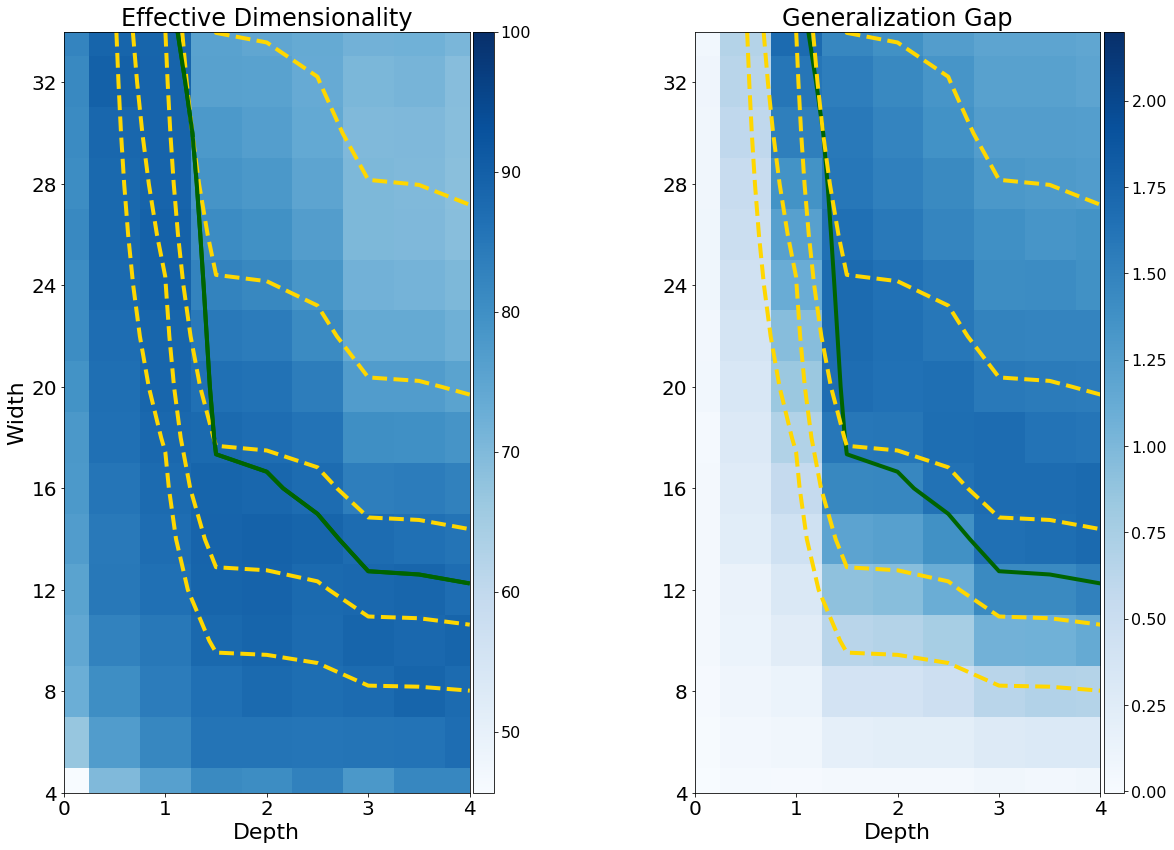

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 14))
plt.subplots_adjust(wspace=0.3)
width_cut = 0
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)


ax1.set_xlabel('Depth', fontsize=ax_fs)
ax1.set_ylabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:] - losses[0, width_cut:, depth_cut:], cmap=colormap, vmax=2.2)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Depth',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Generalization Gap', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)
ax2.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])


# ## train loss ##
# p3 = ax3.imshow(losses[0,width_cut:, depth_cut:], cmap=colormap)
# ax3.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
#            linewidths=4., linestyles='--')

# divider3 = make_axes_locatable(ax3)
# cax3 = divider3.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(p3, cax=cax3)
# cbar.ax.tick_params(labelsize=tick_fs)
# # cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
# plot_cutoff_curve(ax3)
# plot_par_contours(ax3)

# ax3.set_xlabel('Depth', fontsize=ax_fs)
# # ax3.set_ylabel('Width')
# ax3.set_title('Train Loss', fontsize=title_fs)
# ax3.tick_params(axis="both", labelsize=axis_fs)
# ax3.set_xlim(depth_cut, 8-depth_cut)
# ax3.set_ylim(width_cut, 15-width_cut)
# ax3.set_xticklabels([str(i) for i in range(9)][depth_cut:]);
# ax3.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:]);
# plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

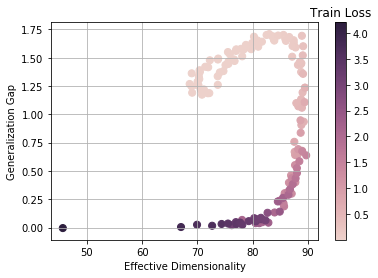

In [36]:
import seaborn as sns

eff_dim2 = eff_dim.reshape(-1)
train_loss2 = losses[0].reshape(-1)
test_loss2 = losses[2].reshape(-1)

gen_gap = test_loss2 - train_loss2

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(eff_dim2, gen_gap, c=train_loss2, s=50, cmap=cmap)
g = f.colorbar(points)
g.ax.set_title('Train Loss')

ax.set_xlabel('Effective Dimensionality')
ax.set_ylabel('Generalization Gap')
ax.grid()

(array([51.,  6.,  3.,  1.,  3.,  4.,  1.,  1.,  2.,  3.]),
 array([0.0038 , 0.05286, 0.10192, 0.15098, 0.20004, 0.2491 , 0.29816,
        0.34722, 0.39628, 0.44534, 0.4944 ]),
 <a list of 10 Patch objects>)

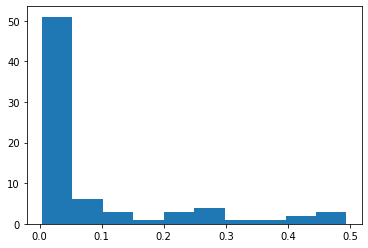

In [30]:
plt.hist(losses[0].reshape(-1)[losses[0].reshape(-1) < 0.5])

In [23]:
eff_dim.reshape(-1)

array([45.63380432, 69.92642212, 76.1947937 , 81.18904877, 80.52313995,
       82.83942413, 78.07463074, 81.73735046, 81.8062439 , 67.02352905,
       76.9491272 , 81.8892746 , 85.67884064, 85.57616425, 85.42508698,
       85.73418427, 85.78237152, 87.05551147, 72.65533447, 80.2653656 ,
       83.9609375 , 86.55251312, 87.71884155, 86.93341827, 87.67852783,
       88.91392517, 87.58808136, 74.36914062, 82.68225861, 84.87431335,
       88.05229187, 88.82514191, 87.53218079, 88.90847015, 88.2564621 ,
       88.75723267, 75.5238266 , 84.89686584, 86.42268372, 88.80229187,
       89.23786926, 87.88660431, 88.18550873, 88.70475769, 87.13942719,
       77.04441071, 84.54470825, 87.08326721, 89.02166748, 89.44245148,
       88.75975037, 87.41559601, 86.43083191, 85.56394196, 77.72803497,
       85.47690582, 87.65168762, 88.80749512, 88.52598572, 87.42747498,
       83.4699173 , 83.86052704, 82.98140717, 78.12138367, 86.47317505,
       88.22987366, 87.75751495, 87.20236206, 85.88798523, 80.22

In [18]:
def plot_par_contours(ax):
    ax.contour(pars.transpose(), levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
               linewidths=4., linestyles='--')

def plot_cutoff_curve(ax):
    ax.contour(losses[0, width_cut:, depth_cut:].transpose(), levels=[0.2],
              linewidths=4., colors='darkgreen')
#     ax.plot(xnew, ynew, linewidth=2., color="orangered")
#     ax.scatter(x, y, color="gold")

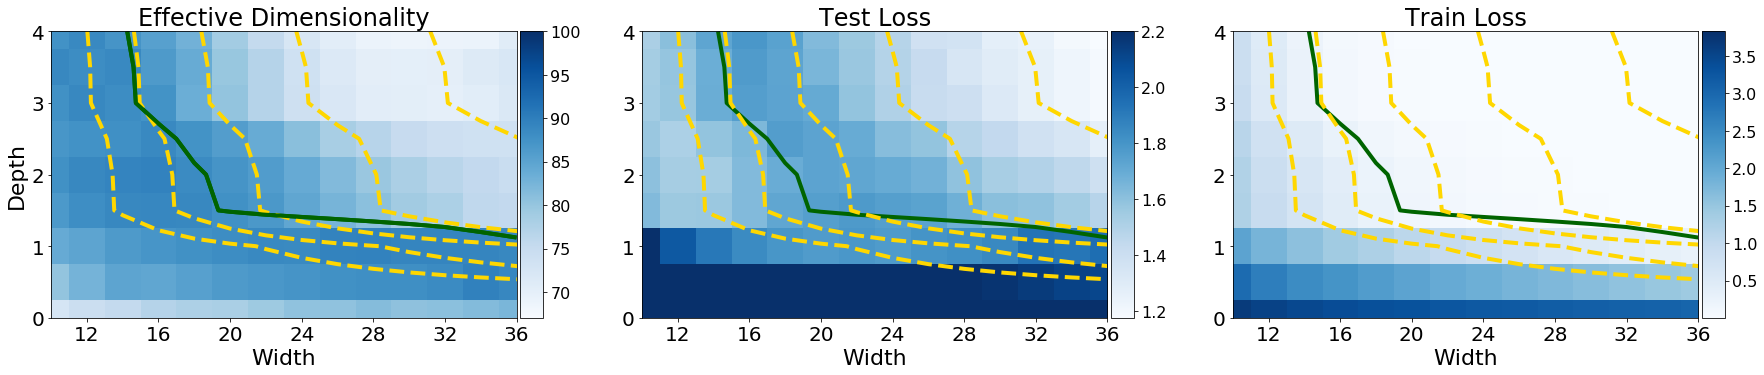

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 25))
plt.subplots_adjust(wspace=0.2)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_ylim(depth_cut, 8-depth_cut)
ax1.set_xlim(width_cut, 15-width_cut)


ax1.set_ylabel('Depth', fontsize=ax_fs)
ax1.set_xlabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=2.2)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Width',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Test Loss', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_ylim(depth_cut, 8-depth_cut)
ax2.set_xlim(width_cut, 15-width_cut)
ax2.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:].transpose(), cmap=colormap)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Width', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Train Loss', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_ylim(depth_cut, 8-depth_cut)
ax3.set_xlim(width_cut, 15-width_cut)
ax3.set_yticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

(3, 12)

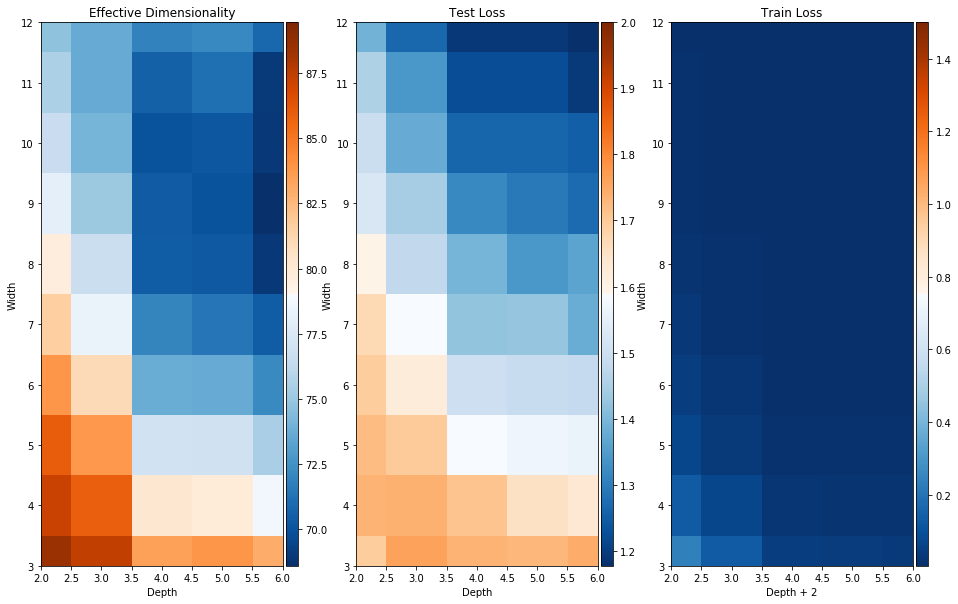

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10))

width_cut = 3
depth_cut = 2
p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=newcmp)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p1, cax=cax)
# plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)


ax1.set_xlabel('Depth')
ax1.set_ylabel('Width')
ax1.set_title('Effective Dimensionality')

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:], cmap=newcmp,
               vmax=2.0)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
fig.colorbar(p2, cax=cax2)

ax2.set_xlabel('Depth')
ax2.set_ylabel('Width')
ax2.set_title('Test Loss')
# plot_cutoff_curve(ax2)
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)

## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:], cmap=newcmp,vmax=1.5)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(p3, cax=cax3)

ax3.set_xlabel('Depth + 2')
ax3.set_ylabel('Width')
ax3.set_title('Train Loss')
# plot_cutoff_curve(ax3)
ax3.set_xlim(depth_cut, 8-depth_cut)
ax3.set_ylim(width_cut, 15-width_cut)

In [153]:
losses.shape

(4, 16, 9)

In [151]:
import hess.nets as nets

In [19]:
model_cfg = getattr(nets, "ConvNet")

pars_im = np.zeros((16, 9))

for i, widths in enumerate(range(4, 68, 4)):
    for j, depths in enumerate(range(9)):
        # we're using cifar100
        model = model_cfg.base(*model_cfg.args, num_classes=100, **model_cfg.kwargs,
                               c=widths, max_depth=depths)
        pars = sum(m.numel() for m in model.parameters())
        pars_im[i,j] = pars

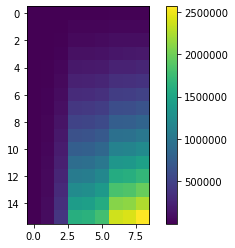

In [22]:
plt.imshow(pars_im)
plt.colorbar()